Emerging Technolgies Project 2020 - Steven Joyce -G00362012

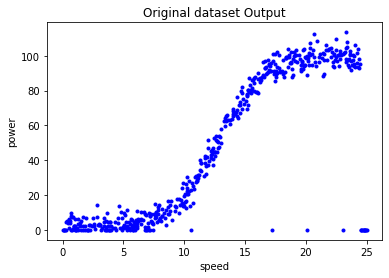

In [3]:
import pandas as pd
import numpy as np
import tensorflow
# neural networks
import tensorflow.keras as kr
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import scipy.spatial as spatial

# Reading in the csv file
dataset = pd.read_csv("powerproduction.csv")
dataset.head()
plt.title('Original dataset Output')
plt.xlabel('speed')
plt.ylabel('power')
plt.plot(dataset.values[:,0], dataset.values[:,1], 'b.');

In [4]:
train_data = dataset
distances = list()
i = 0
j = i + 1
for t in train_data.values:
    # compute distance between points at index i and j
    d = spatial.distance.pdist(np.array([train_data.values[i], train_data.values[j]]), 'euclidean')
    distances.append(d[0])
    # if j reaches last index - break
    if j == train_data['speed'].values.size - 1:
        break
    # increment index vals 
    i = i + 1
    j = i + 1
        
# calculate mean distance between points
avg_dist = np.mean(distances)
avg_dist

5.6731936201644775

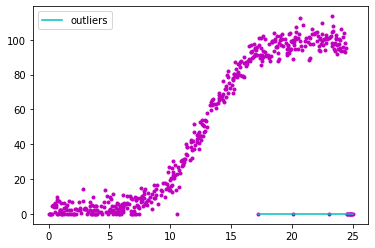

In [5]:
clustering = DBSCAN(eps=avg_dist, min_samples=15).fit(train_data)

# find outliers/anomolies (-1 denotes noisy data)
outliers = np.where(clustering.labels_ == -1)
outliers = outliers[0]

# Retrieve outlier wind/speed data
outlierPoints = train_data.values[outliers]

plt.plot(train_data.values[:,0], train_data.values[:,1], 'm.')
plt.plot(outlierPoints[:,0], outlierPoints[:,1], color='c', label='outliers')
plt.legend();

In [6]:
modataset = train_data.drop(outliers)

In [10]:
# train model
model = kr.models.Sequential()
model.add(Dense(100, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(layers.LayerNormalization(axis=1))
model.add(Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# compile model
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')
# Train the neural network on our data.
model.fit(modataset['speed'], modataset['power'], epochs=1000, batch_size=10)

Epoch 1/1000
49/49 [==============================] - 0s 1ms/step - loss: 3849.8308
Epoch 2/1000
49/49 [==============================] - 0s 979us/step - loss: 3385.7490
Epoch 3/1000
49/49 [==============================] - 0s 917us/step - loss: 2602.0996
Epoch 4/1000
49/49 [==============================] - 0s 1ms/step - loss: 2157.5178
Epoch 5/1000
49/49 [==============================] - 0s 1ms/step - loss: 1872.7864
Epoch 6/1000
49/49 [==============================] - 0s 1ms/step - loss: 1637.7701
Epoch 7/1000
49/49 [==============================] - 0s 896us/step - loss: 1275.6891
Epoch 8/1000
49/49 [==============================] - 0s 917us/step - loss: 1029.1171
Epoch 9/1000
49/49 [==============================] - 0s 917us/step - loss: 804.1713
Epoch 10/1000
49/49 [==============================] - 0s 1ms/step - loss: 644.6696
Epoch 11/1000
49/49 [==============================] - 0s 1ms/step - loss: 490.9004
Epoch 12/1000
49/49 [==============================] - 0s 986us/ste

49/49 [==============================] - 0s 875us/step - loss: 36.4670
Epoch 98/1000
49/49 [==============================] - 0s 917us/step - loss: 33.8346
Epoch 99/1000
49/49 [==============================] - 0s 917us/step - loss: 36.4990
Epoch 100/1000
49/49 [==============================] - 0s 958us/step - loss: 28.8907
Epoch 101/1000
49/49 [==============================] - 0s 1ms/step - loss: 34.5624
Epoch 102/1000
49/49 [==============================] - 0s 875us/step - loss: 38.4041
Epoch 103/1000
49/49 [==============================] - 0s 875us/step - loss: 33.3624
Epoch 104/1000
49/49 [==============================] - 0s 939us/step - loss: 31.7051
Epoch 105/1000
49/49 [==============================] - 0s 875us/step - loss: 29.9567
Epoch 106/1000
49/49 [==============================] - 0s 875us/step - loss: 28.8095
Epoch 107/1000
49/49 [==============================] - 0s 917us/step - loss: 31.7380
Epoch 108/1000
49/49 [==============================] - 0s 896us/step - l

49/49 [==============================] - 0s 896us/step - loss: 19.8648
Epoch 193/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.9488
Epoch 194/1000
49/49 [==============================] - 0s 1ms/step - loss: 22.4440
Epoch 195/1000
49/49 [==============================] - 0s 875us/step - loss: 21.3385
Epoch 196/1000
49/49 [==============================] - 0s 937us/step - loss: 19.3055
Epoch 197/1000
49/49 [==============================] - 0s 875us/step - loss: 21.3810
Epoch 198/1000
49/49 [==============================] - 0s 875us/step - loss: 21.3876
Epoch 199/1000
49/49 [==============================] - 0s 917us/step - loss: 19.2094
Epoch 200/1000
49/49 [==============================] - 0s 896us/step - loss: 22.1239
Epoch 201/1000
49/49 [==============================] - 0s 875us/step - loss: 21.3195
Epoch 202/1000
49/49 [==============================] - 0s 1ms/step - loss: 19.7845
Epoch 203/1000
49/49 [==============================] - 0s 937us/step - los

49/49 [==============================] - 0s 1ms/step - loss: 19.7045
Epoch 288/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.7050
Epoch 289/1000
49/49 [==============================] - 0s 875us/step - loss: 16.6637
Epoch 290/1000
49/49 [==============================] - 0s 917us/step - loss: 17.4843
Epoch 291/1000
49/49 [==============================] - 0s 917us/step - loss: 18.1431
Epoch 292/1000
49/49 [==============================] - 0s 875us/step - loss: 19.5964
Epoch 293/1000
49/49 [==============================] - 0s 875us/step - loss: 18.9170
Epoch 294/1000
49/49 [==============================] - 0s 896us/step - loss: 18.7673
Epoch 295/1000
49/49 [==============================] - 0s 875us/step - loss: 18.9419
Epoch 296/1000
49/49 [==============================] - 0s 896us/step - loss: 20.5987
Epoch 297/1000
49/49 [==============================] - 0s 917us/step - loss: 19.1576
Epoch 298/1000
49/49 [==============================] - 0s 917us/step - l

49/49 [==============================] - 0s 896us/step - loss: 20.4087
Epoch 383/1000
49/49 [==============================] - 0s 910us/step - loss: 16.7221
Epoch 384/1000
49/49 [==============================] - 0s 938us/step - loss: 18.2662
Epoch 385/1000
49/49 [==============================] - 0s 917us/step - loss: 19.4988
Epoch 386/1000
49/49 [==============================] - 0s 896us/step - loss: 18.2867
Epoch 387/1000
49/49 [==============================] - 0s 875us/step - loss: 18.2830
Epoch 388/1000
49/49 [==============================] - 0s 917us/step - loss: 17.1992
Epoch 389/1000
49/49 [==============================] - 0s 875us/step - loss: 20.9862
Epoch 390/1000
49/49 [==============================] - 0s 875us/step - loss: 19.0467
Epoch 391/1000
49/49 [==============================] - 0s 917us/step - loss: 19.0419
Epoch 392/1000
49/49 [==============================] - 0s 896us/step - loss: 18.2423
Epoch 393/1000
49/49 [==============================] - 0s 896us/step

49/49 [==============================] - 0s 875us/step - loss: 19.5621
Epoch 478/1000
49/49 [==============================] - 0s 958us/step - loss: 20.9918
Epoch 479/1000
49/49 [==============================] - 0s 896us/step - loss: 18.3574
Epoch 480/1000
49/49 [==============================] - 0s 875us/step - loss: 19.6849
Epoch 481/1000
49/49 [==============================] - 0s 896us/step - loss: 19.9784
Epoch 482/1000
49/49 [==============================] - 0s 917us/step - loss: 19.5195
Epoch 483/1000
49/49 [==============================] - 0s 875us/step - loss: 16.1032
Epoch 484/1000
49/49 [==============================] - 0s 917us/step - loss: 18.8247
Epoch 485/1000
49/49 [==============================] - 0s 917us/step - loss: 18.4795
Epoch 486/1000
49/49 [==============================] - 0s 896us/step - loss: 22.2039
Epoch 487/1000
49/49 [==============================] - 0s 896us/step - loss: 15.7243
Epoch 488/1000
49/49 [==============================] - 0s 917us/step

49/49 [==============================] - 0s 896us/step - loss: 18.7482
Epoch 573/1000
49/49 [==============================] - 0s 875us/step - loss: 17.9160
Epoch 574/1000
49/49 [==============================] - 0s 917us/step - loss: 24.8225
Epoch 575/1000
49/49 [==============================] - 0s 917us/step - loss: 19.2314
Epoch 576/1000
49/49 [==============================] - 0s 875us/step - loss: 16.2737
Epoch 577/1000
49/49 [==============================] - 0s 875us/step - loss: 20.2385
Epoch 578/1000
49/49 [==============================] - 0s 970us/step - loss: 18.1695
Epoch 579/1000
49/49 [==============================] - 0s 875us/step - loss: 16.3040
Epoch 580/1000
49/49 [==============================] - 0s 875us/step - loss: 17.3879
Epoch 581/1000
49/49 [==============================] - 0s 917us/step - loss: 18.2354
Epoch 582/1000
49/49 [==============================] - 0s 896us/step - loss: 18.3867
Epoch 583/1000
49/49 [==============================] - 0s 875us/step

49/49 [==============================] - 0s 937us/step - loss: 16.9773
Epoch 668/1000
49/49 [==============================] - 0s 958us/step - loss: 18.9998
Epoch 669/1000
49/49 [==============================] - 0s 917us/step - loss: 21.7722
Epoch 670/1000
49/49 [==============================] - 0s 896us/step - loss: 17.3351
Epoch 671/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.3914
Epoch 672/1000
49/49 [==============================] - 0s 917us/step - loss: 18.2599
Epoch 673/1000
49/49 [==============================] - 0s 1ms/step - loss: 16.5686
Epoch 674/1000
49/49 [==============================] - 0s 896us/step - loss: 20.0046
Epoch 675/1000
49/49 [==============================] - 0s 917us/step - loss: 16.4000
Epoch 676/1000
49/49 [==============================] - 0s 1ms/step - loss: 21.0304
Epoch 677/1000
49/49 [==============================] - 0s 896us/step - loss: 18.7940
Epoch 678/1000
49/49 [==============================] - 0s 875us/step - los

49/49 [==============================] - 0s 933us/step - loss: 19.8778
Epoch 763/1000
49/49 [==============================] - 0s 1ms/step - loss: 20.1700
Epoch 764/1000
49/49 [==============================] - 0s 917us/step - loss: 19.6343
Epoch 765/1000
49/49 [==============================] - 0s 854us/step - loss: 15.8794
Epoch 766/1000
49/49 [==============================] - 0s 917us/step - loss: 17.2527
Epoch 767/1000
49/49 [==============================] - 0s 917us/step - loss: 17.3208
Epoch 768/1000
49/49 [==============================] - 0s 1ms/step - loss: 18.5819
Epoch 769/1000
49/49 [==============================] - 0s 896us/step - loss: 15.7525
Epoch 770/1000
49/49 [==============================] - 0s 854us/step - loss: 21.4774
Epoch 771/1000
49/49 [==============================] - 0s 917us/step - loss: 18.9617
Epoch 772/1000
49/49 [==============================] - 0s 917us/step - loss: 17.9802
Epoch 773/1000
49/49 [==============================] - 0s 854us/step - l

49/49 [==============================] - 0s 896us/step - loss: 17.3292
Epoch 858/1000
49/49 [==============================] - 0s 938us/step - loss: 19.7807
Epoch 859/1000
49/49 [==============================] - 0s 958us/step - loss: 19.2603
Epoch 860/1000
49/49 [==============================] - 0s 958us/step - loss: 16.6341
Epoch 861/1000
49/49 [==============================] - 0s 1000us/step - loss: 17.8193
Epoch 862/1000
49/49 [==============================] - 0s 875us/step - loss: 19.9436
Epoch 863/1000
49/49 [==============================] - 0s 896us/step - loss: 19.3187
Epoch 864/1000
49/49 [==============================] - 0s 917us/step - loss: 20.1655
Epoch 865/1000
49/49 [==============================] - 0s 875us/step - loss: 16.9305
Epoch 866/1000
49/49 [==============================] - 0s 896us/step - loss: 17.2587
Epoch 867/1000
49/49 [==============================] - 0s 896us/step - loss: 17.9255
Epoch 868/1000
49/49 [==============================] - 0s 854us/ste

49/49 [==============================] - 0s 875us/step - loss: 18.7695
Epoch 953/1000
49/49 [==============================] - 0s 1ms/step - loss: 16.4350
Epoch 954/1000
49/49 [==============================] - 0s 917us/step - loss: 18.6274
Epoch 955/1000
49/49 [==============================] - 0s 896us/step - loss: 20.2582
Epoch 956/1000
49/49 [==============================] - 0s 917us/step - loss: 17.3584
Epoch 957/1000
49/49 [==============================] - 0s 875us/step - loss: 20.2629
Epoch 958/1000
49/49 [==============================] - 0s 937us/step - loss: 15.7535
Epoch 959/1000
49/49 [==============================] - 0s 917us/step - loss: 17.7649
Epoch 960/1000
49/49 [==============================] - 0s 917us/step - loss: 19.2697
Epoch 961/1000
49/49 [==============================] - 0s 875us/step - loss: 16.2771
Epoch 962/1000
49/49 [==============================] - 0s 875us/step - loss: 18.9493
Epoch 963/1000
49/49 [==============================] - 0s 896us/step -

In [8]:
model.predict([20])

array([[98.73273]], dtype=float32)

In [30]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               200       
_________________________________________________________________
layer_normalization_4 (Layer (None, 100)               200       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


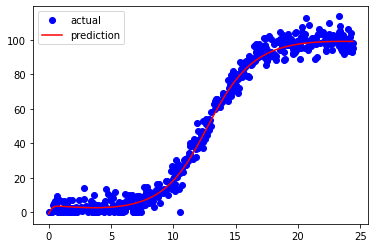

In [31]:
plt.plot(modataset['speed'], modataset['power'], "bo", label='actual')
plt.plot(modataset['speed'], model.predict(modataset['speed']),'r', label='prediction')
plt.legend();

In [33]:
model.save("datamodel.h5")
print("Saved model to directory")

Saved model to directory


In [2]:
# User can run a prediction for the dataset
user = int(input("Enter Wind Speed prediction: "));
dataset['speed'] = user
dataset['power'] = model.predict(ppDataSet['speed'])
power = dataset['power'][0]
print("Power Prediction: ", power)

Enter Wind Speed prediction: 25


NameError: name 'dataset' is not defined